In [ ]:
!git clone https://github.com/harveyslash/Facial-Similarity-with-Siamese-Networks-in-Pytorch.git
!mkdir data
!mv Facial-Similarity-with-Siamese-Networks-in-Pytorch/data/faces/testing/* data/
!mv Facial-Similarity-with-Siamese-Networks-in-Pytorch/data/faces/training/* data/

!apt install -y libboost-all-dev
!pip install -U pip
!pip install "pybind11[global]"

!pip install aijack

Cloning into 'Facial-Similarity-with-Siamese-Networks-in-Pytorch'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 550 (delta 6), reused 18 (delta 6), pack-reused 532
Receiving objects: 100% (550/550), 6.32 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (27/27), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libboost-all-dev is already the newest version (1.71.0.0ubuntu2).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling

In [ ]:
import cv2
import copy
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from numpy import e
from matplotlib import pyplot as plt
import torch.optim as optim
from tqdm.notebook import tqdm

from aijack.collaborative.fedavg import FedAVGAPI, FedAVGClient, FedAVGServer
from aijack.attack.inversion import GradientInversionAttackServerManager
from torch.utils.data import DataLoader, TensorDataset
from aijack.utils import NumpyDataset

import warnings
import numpy as np
warnings.filterwarnings("ignore")

BASE = "data/"
path = "/content/drive/MyDrive/SLPwoapprox_Results/"

In [ ]:
imgs = []
labels = []
for i in range(1, 41):
    for j in range(1, 8):
        img = cv2.imread(BASE + f"s{i}/{j}.pgm", 0)
        imgs.append(img)
        labels.append(i - 1)

X = np.stack(imgs)
y = np.array(labels)

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
trainset = NumpyDataset(X, y, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=4, shuffle=True, num_workers=2
)


del X
del y


for i in range(1, 41):
    for j in range(8,11):
        img = cv2.imread(BASE + f"s{i}/{j}.pgm", 0)
        imgs.append(img)
        labels.append(i - 1)

X = np.stack(imgs)
y = np.array(labels)

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)
testset = NumpyDataset(X, y, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=4, shuffle=True, num_workers=2
)

In [ ]:
# simply define a relu approx function
def relu(input):
    return 0.563059 + 0.5*input + 0.078047*input*input#0.119782 + 0.5*out + 0.147298*out*out-0.002015*out*out*out*out

# create a class wrapper from PyTorch nn.Module, so
# the function now can be easily used in models
class ReLu(nn.Module):
    def __init__(self):
        super().__init__() # init the base class

    def forward(self, input):
        return relu(input) # simply apply already implemented relu

# initialize activation function
activation_function = ReLu()

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fla = nn.Flatten()
        self.fc = nn.Linear(112 * 92, 100)
        self.fc2 = nn.Linear(100,40)

    def forward(self, x):
        x = self.fla(x)
        x = self.fc(x)
        x = relu(x)
        x = self.fc2(x)
        return x

#iDLG Attack


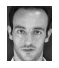

In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else "cpu"
for data in trainloader:
    xs, ys = data[0], data[1]
    break

x = xs[:1]
y = ys[:1]

fig = plt.figure(figsize=(1, 1))
plt.axis("off")
plt.imshow(x.detach().numpy()[0][0], cmap="gray")
plt.show()

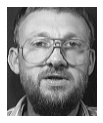

communication 0, epoch 0: client-1 3.684354782104492
iter=77: loss did not improve in the last 50 rounds.


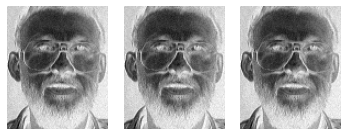

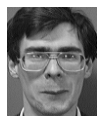

communication 0, epoch 0: client-1 3.607725143432617
iter=86: loss did not improve in the last 50 rounds.
iter=68: loss did not improve in the last 50 rounds.


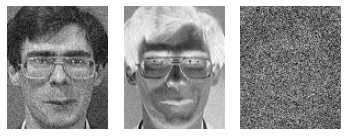

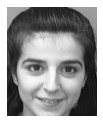

communication 0, epoch 0: client-1 3.7048025131225586
iter=53: loss did not improve in the last 50 rounds.
iter=99: loss did not improve in the last 50 rounds.


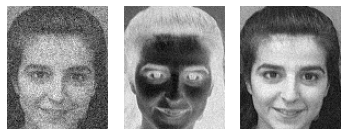

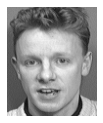

communication 0, epoch 0: client-1 3.7137327194213867
iter=72: loss did not improve in the last 50 rounds.
iter=72: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=57: loss did not improve in the last 50 rounds.


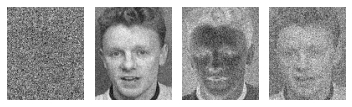

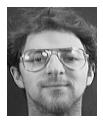

communication 0, epoch 0: client-1 3.4906342029571533
iter=63: loss did not improve in the last 50 rounds.
iter=80: loss did not improve in the last 50 rounds.


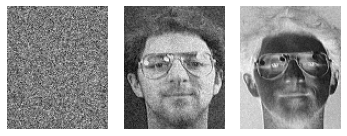

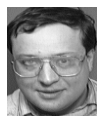

communication 0, epoch 0: client-1 3.2873291969299316
iter=54: loss did not improve in the last 50 rounds.
iter=89: loss did not improve in the last 50 rounds.


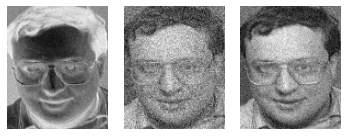

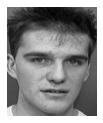

communication 0, epoch 0: client-1 3.891753911972046
iter=78: loss did not improve in the last 50 rounds.


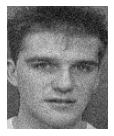

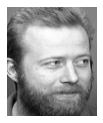

communication 0, epoch 0: client-1 3.952425956726074
iter=90: loss did not improve in the last 50 rounds.
iter=53: loss did not improve in the last 50 rounds.


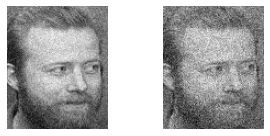

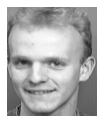

communication 0, epoch 0: client-1 3.461245059967041
iter=81: loss did not improve in the last 50 rounds.


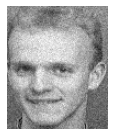

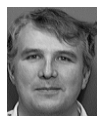

communication 0, epoch 0: client-1 3.835075855255127
iter=68: loss did not improve in the last 50 rounds.
iter=72: loss did not improve in the last 50 rounds.


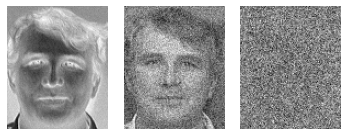

In [ ]:
criterion = nn.CrossEntropyLoss()
i=0
for data in testloader:
  if i==10:
    break
  else:
    xs, ys = data[0], data[1]
    x = xs[:1]
    y = ys[:1]
    name= "/content/drive/MyDrive/iDLG/"+"original"+str(i)+".png"
    fig = plt.figure(figsize=(5, 2))
    plt.axis("off")
    plt.imshow(x.detach().numpy()[0][0], cmap="gray")
    plt.savefig(name)
    plt.show()
    manager = GradientInversionAttackServerManager(
        (1, 112, 92),#Shape of input sample
        num_trial_per_communication=5,#Number of attack attems per connection
        log_interval=0,#The interval of logging
        num_iteration=100,#Number of iterations for optimization
        distancename="l2",#Distance metric 
        device=device,
        gradinvattack_kwargs={"lr": 1.0},#Learning rate
    )
    iDLGFedAVGServer = manager.attach(FedAVGServer)

    client = FedAVGClient(
        MLP().to(device),
        lr=1.0,
        device=device,
    )
    server = iDLGFedAVGServer(
        [client],
        MLP().to(device),
        lr=1.0,
        device=device,
    )

    local_dataloaders = [DataLoader(TensorDataset(x, y))]
    local_optimizers = [optim.SGD(client.parameters(), lr=1.0)]

    api = FedAVGAPI(
        server,
        [client],
        criterion,
        local_optimizers,
        local_dataloaders,
        num_communication=1,
        local_epoch=1,
        use_gradients=True,
        device=device,
    )

    api.run()
    fig = plt.figure(figsize=(5, 2))
    for s, result in enumerate(server.attack_results[0]):
        ax = fig.add_subplot(1, len(server.attack_results[0]), s + 1)
        ax.imshow(result[0].cpu().detach().numpy()[0][0], cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    name= "/content/drive/MyDrive/iDLG/"+"extracted"+str(i)+".png"
    plt.savefig(name)
    plt.show()
    i+=1

#Trying defense


In [ ]:
from aijack.defense import GeneralMomentAccountant, DPSGDManager
lot_size = 40
batch_size = 1
iterations = 20
sigma = 0.5
l2_norm_clip = 1
delta = 1e-5

accountant = GeneralMomentAccountant(
    noise_type="Gaussian",
    search="ternary",
    precision=0.001,
    order_max=1,
    order_min=72,
    max_iterations=1000,
    bound_type="rdp_upperbound_closedformula",
    backend="python",
)

privacy_manager = DPSGDManager(
    accountant,
    optim.SGD,
    l2_norm_clip=l2_norm_clip,
    dataset=trainset,
    lot_size=lot_size,
    batch_size=batch_size,
    iterations=iterations,
)
accountant.reset_step_info()
accountant.add_step_info(
    {"sigma": sigma},
    lot_size / len(trainset),
    iterations * (len(trainset) / lot_size),
)
estimated_epsilon = accountant.get_epsilon(delta=delta)
print(f"estimated epsilon is {estimated_epsilon}")

accountant.reset_step_info()
dpoptimizer_cls, lot_loader, batch_loader = privacy_manager.privatize(
    noise_multiplier=sigma
)

estimated epsilon is 56.384900436393984


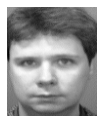

communication 0, epoch 0: client-1 4.074710845947266
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


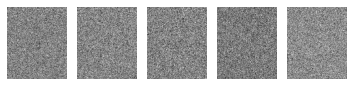

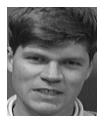

communication 0, epoch 0: client-1 3.5398759841918945
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


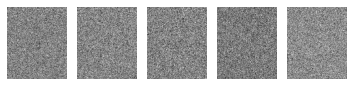

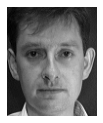

communication 0, epoch 0: client-1 3.6933624744415283
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


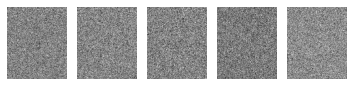

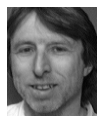

communication 0, epoch 0: client-1 3.639616012573242
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


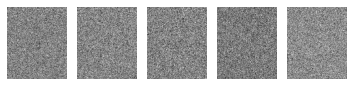

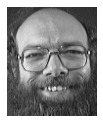

communication 0, epoch 0: client-1 3.7222628593444824
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


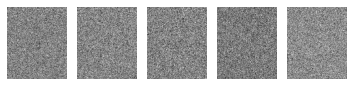

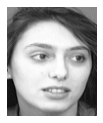

communication 0, epoch 0: client-1 3.850163698196411
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


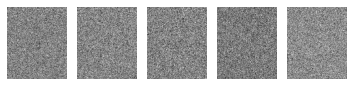

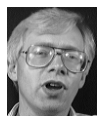

communication 0, epoch 0: client-1 3.6017911434173584
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


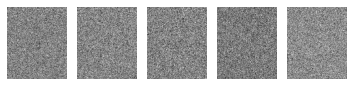

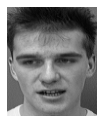

communication 0, epoch 0: client-1 3.836019992828369
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


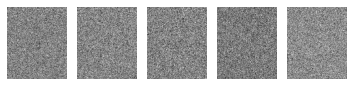

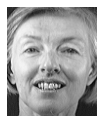

communication 0, epoch 0: client-1 3.386504888534546
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


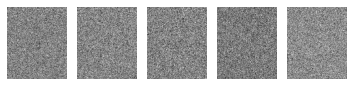

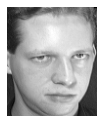

communication 0, epoch 0: client-1 4.103074073791504
iter=54: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.
iter=54: loss did not improve in the last 50 rounds.
iter=55: loss did not improve in the last 50 rounds.


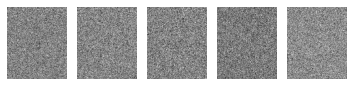

In [ ]:
net = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = dpoptimizer_cls(net.parameters(), lr=0.05, momentum=0.9)
i = 0
for data in testloader:
  if i==10:
    break
  else:
    xs, ys = data[0], data[1]
    x = xs[:1]
    y = ys[:1]
    name= "/content/drive/MyDrive/iDLG/"+"original_DPSGD"+str(i)+".png"
    fig = plt.figure(figsize=(5, 2))
    plt.axis("off")
    plt.imshow(x.detach().numpy()[0][0], cmap="gray")
    plt.savefig(name)
    plt.show()
        
    manager = GradientInversionAttackServerManager(
        (1, 112, 92),
        num_trial_per_communication=5,
        log_interval=0,
        num_iteration=100,
        distancename="l2",
        device=device,
        gradinvattack_kwargs={"lr": 1.0},
    )
    iDLGFedAVGServer = manager.attach(FedAVGServer)

    client = FedAVGClient(
        net.to(device),
        lr=1.0,
        device=device,
    )
    server = iDLGFedAVGServer(
        [client],
        net.to(device),
        lr=1.0,
        device=device,
    )

    local_dataloaders = [DataLoader(TensorDataset(x, y))]
    local_optimizers = [dpoptimizer_cls(net.parameters(), lr=0.05, momentum=0.9)]

    api = FedAVGAPI(
        server,
        [client],
        criterion,
        local_optimizers,
        local_dataloaders,
        num_communication=1,
        local_epoch=1,
        use_gradients=True,
        device=device,
    )

    api.run()

    fig = plt.figure(figsize=(5, 2))
    for s, result in enumerate(server.attack_results[0]):
        ax = fig.add_subplot(1, len(server.attack_results[0]), s + 1)
        ax.imshow(result[0].cpu().detach().numpy()[0][0], cmap="gray")
        ax.axis("off")
    plt.tight_layout()
    name= "/content/drive/MyDrive/iDLG/"+"extracted_with_DPSGD"+str(i)+".png"
    plt.savefig(name)
    plt.show()
    i+=1

#GradInversion
in progress


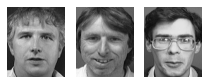

In [ ]:
batch_size = 3
x_batch = xs[:batch_size]
y_batch = ys[:batch_size]

fig = plt.figure(figsize=(3, 2))
for bi in range(batch_size):
    ax = fig.add_subplot(1, batch_size, bi + 1)
    ax.imshow(x_batch[bi].detach().numpy()[0], cmap="gray")
    ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
from aijack.attack.inversion import GradientInversion_Attack
criterion = nn.CrossEntropyLoss()
net = MLP()
pred = net(x_batch)
loss = criterion(pred, y_batch)
received_gradients = torch.autograd.grad(loss, net.parameters())
received_gradients = [cg.detach() for cg in received_gradients]

gradinversion = GradientInversion_Attack(
    net,
    (1, 112, 92),
    num_iteration=1000,
    lr=1e2,
    log_interval=0,
    optimizer_class=torch.optim.SGD,
    distancename="l2",
    optimize_label=False,
    group_num=3,
    tv_reg_coef=0.00,
    l2_reg_coef=0.0001,
    gc_reg_coef=0.001,
)

result = gradinversion.group_attack(received_gradients, batch_size=batch_size)

fig = plt.figure(figsize=(3, 2))
for bid in range(batch_size):
    ax1 = fig.add_subplot(1, batch_size, bid + 1)
    ax1.imshow((sum(result[0]) / len(result[0])).detach().numpy()[bid][0], cmap="gray")
    ax1.axis("off")
plt.tight_layout()
plt.show()